# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Merging the required CSV files with different columns to get desired dataset.

In [ ]:
fertilizer_quantity = pd.read_csv("/content/fertilizer-consumption-usda.csv")
fertilizer_data = pd.read_csv("/content/fertilizer-use-nutrient.csv")

In [ ]:
merged_df = pd.merge(fertilizer_quantity, fertilizer_data, on=['Entity', 'Code', 'Year'], how='inner')
merged_df.to_csv('/content/merged_data.csv', index=False)
merged_df.head()

,Entity,Code,Year,fertilizer_quantity,Nutrient nitrogen N (total) | 00003102 || Agricultural Use | 005157 || tonnes,Nutrient potash K2O (total) | 00003104 || Agricultural Use | 005157 || tonnes,Nutrient phosphate P2O5 (total) | 00003103 || Agricultural Use | 005157 || tonnes
0,Afghanistan,AFG,1961,57345,1000.0,NaN,100.0
1,Afghanistan,AFG,1962,58146,1000.0,NaN,100.0
2,Afghanistan,AFG,1963,59694,1000.0,NaN,100.0
3,Afghanistan,AFG,1964,60006,1000.0,NaN,100.0
4,Afghanistan,AFG,1965,61821,1000.0,NaN,100.0


In [ ]:
pesticide_data = pd.read_csv("/content/pesticide-use-tonnes.csv")
merged_data2 = pd.merge(merged_df, pesticide_data, on = ['Entity','Code','Year'], how='inner')

In [ ]:
water_data = pd.read_csv("/content/renewable-water-resources-per-capita.csv")
merged_data3 = pd.merge(merged_data2, water_data, on = ['Entity','Code','Year'], how='inner')

In [ ]:
staple_crops_data = pd.read_csv("/content/yields-of-important-staple-crops.csv")
merged_data4 = pd.merge(merged_data3, staple_crops_data, on = ['Entity','Code','Year'], how='inner')

In [ ]:
merged_data4.to_csv('/content/final_merged_data.csv', index=False)

In [ ]:
df1 = pd.read_csv("/content/final_merged_data.csv")

In [ ]:
df1.head()

,Entity,Code,Year,fertilizer_quantity,Nutrient nitrogen N (total) | 00003102 || Agricultural Use | 005157 || tonnes,Nutrient potash K2O (total) | 00003104 || Agricultural Use | 005157 || tonnes,Nutrient phosphate P2O5 (total) | 00003103 || Agricultural Use | 005157 || tonnes,Pesticides (total) | 00001357 || Agricultural Use | 005157 || tonnes,Renewable internal freshwater resources per capita (cubic meters),Wheat yield,Rice yield,Barley yield,Maize yield,Rye yield,Oats yield,Millet yield,Sorghum yield,Potatoes yield
0,Albania,ALB,1990,135138,73500.0,3000.0,25500.0,121.0,8184.8945,3.0197,2.3333,1.0000,3.6613,0.6667,0.7500,NaN,1.2500,6.6667
1,Albania,ALB,1991,64024,22300.0,1300.0,7700.0,121.0,8234.3830,2.0698,2.8538,0.9231,2.9068,0.3587,0.7500,NaN,0.6667,7.7818
2,Albania,ALB,1992,55076,14800.0,NaN,8700.0,121.0,8284.4710,2.4388,4.0000,1.3802,2.4876,1.2466,0.9404,NaN,0.3773,8.2920
3,Albania,ALB,1993,51403,15220.0,1100.0,1570.0,121.0,8335.1750,2.9976,4.1786,1.3324,2.4185,1.1586,1.2252,NaN,NaN,9.8446
4,Albania,ALB,1994,58365,12680.0,NaN,2090.0,201.0,8386.5000,2.4745,NaN,2.3523,2.5848,1.4106,1.7354,NaN,NaN,8.1404


## Changing column names.

In [ ]:
# Define a dictionary with the new column names
new_column_names = {
    'Nutrient nitrogen N (total) | 00003102 || Agricultural Use | 005157 || tonnes': 'Nitrogen',
    'Nutrient potash K2O (total) | 00003104 || Agricultural Use | 005157 || tonnes': 'Potash',
    'Nutrient phosphate P2O5 (total) | 00003103 || Agricultural Use | 005157 || tonnes': 'Phosphate',
    'Pesticides (total) | 00001357 || Agricultural Use | 005157 || tonnes': 'Pesticides',
    'Renewable internal freshwater resources per capita (cubic meters)': 'Water_resources'
}

# Use the rename method to change column names
df1 = df1.rename(columns=new_column_names)

In [ ]:
df1.head()

,Entity,Code,Year,fertilizer_quantity,Nitrogen,Potash,Phosphate,Pesticides,Water_resources,Wheat yield,Rice yield,Barley yield,Maize yield,Rye yield,Oats yield,Millet yield,Sorghum yield,Potatoes yield
0,Albania,ALB,1990,135138,73500.0,3000.0,25500.0,121.0,8184.8945,3.0197,2.3333,1.0000,3.6613,0.6667,0.7500,NaN,1.2500,6.6667
1,Albania,ALB,1991,64024,22300.0,1300.0,7700.0,121.0,8234.3830,2.0698,2.8538,0.9231,2.9068,0.3587,0.7500,NaN,0.6667,7.7818
2,Albania,ALB,1992,55076,14800.0,NaN,8700.0,121.0,8284.4710,2.4388,4.0000,1.3802,2.4876,1.2466,0.9404,NaN,0.3773,8.2920
3,Albania,ALB,1993,51403,15220.0,1100.0,1570.0,121.0,8335.1750,2.9976,4.1786,1.3324,2.4185,1.1586,1.2252,NaN,NaN,9.8446
4,Albania,ALB,1994,58365,12680.0,NaN,2090.0,201.0,8386.5000,2.4745,NaN,2.3523,2.5848,1.4106,1.7354,NaN,NaN,8.1404


# DATASET CLEANING

In [ ]:
Mexico = df1[df1['Entity'] == 'Mexico']

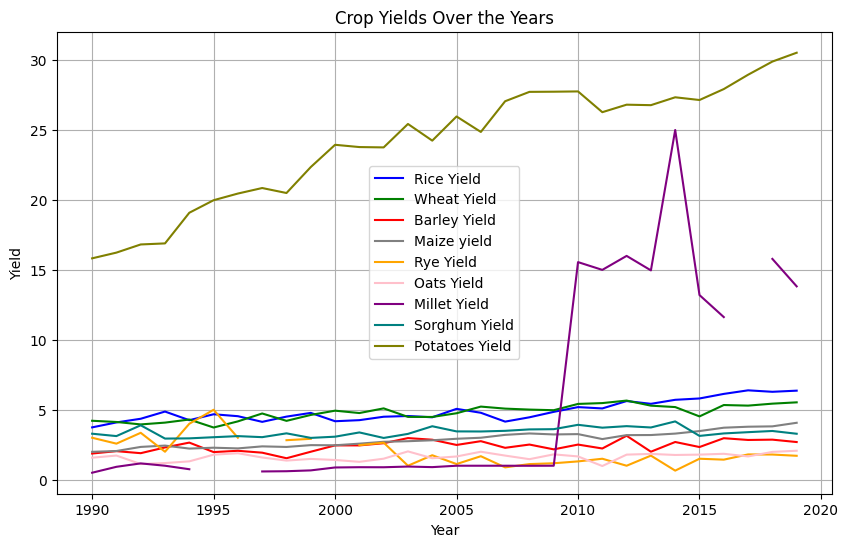

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(Mexico['Year'], Mexico['Rice yield'], label='Rice Yield', color='blue')
plt.plot(Mexico['Year'], Mexico['Wheat yield'], label='Wheat Yield', color='green')
plt.plot(Mexico['Year'], Mexico['Barley yield'], label='Barley Yield', color='red')
plt.plot(Mexico['Year'], Mexico['Maize yield'], label='Maize yield', color='gray')
plt.plot(Mexico['Year'], Mexico['Rye yield'], label='Rye Yield', color='orange')
plt.plot(Mexico['Year'], Mexico['Oats yield'], label='Oats Yield', color='pink')
plt.plot(Mexico['Year'], Mexico['Millet yield'], label='Millet Yield', color='purple')
plt.plot(Mexico['Year'], Mexico['Sorghum yield'], label='Sorghum Yield', color='teal')
plt.plot(Mexico['Year'], Mexico['Potatoes yield'], label='Potatoes Yield', color='olive')

plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Crop Yields Over the Years')
plt.legend()

plt.grid(True)
plt.show()

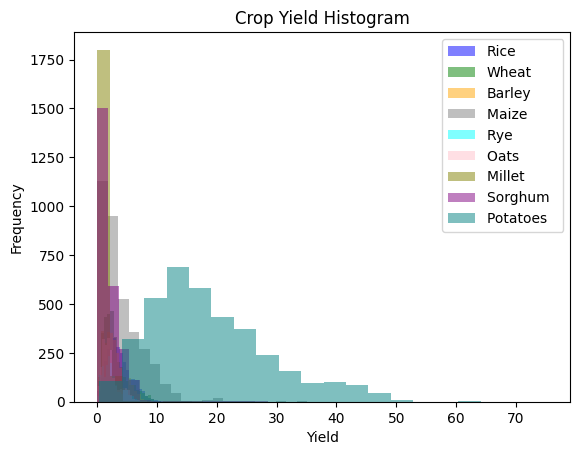

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

# Plot rice yield histogram
plt.hist(df1['Rice yield'], bins=20, alpha=0.5, label='Rice', color='blue')

# Plot wheat yield histogram in same figure
plt.hist(df1['Wheat yield'], bins=20, alpha=0.5, label='Wheat', color='green')


plt.hist(df1['Barley yield'], bins=20, alpha=0.5, label='Barley', color='orange')

plt.hist(df1['Maize yield'], bins=20, alpha=0.5, label='Maize ', color='gray')
plt.hist(df1['Rye yield'], bins=20, alpha=0.5, label='Rye ', color='cyan')
plt.hist(df1['Oats yield'], bins=20, alpha=0.5, label='Oats ', color='pink')
plt.hist(df1['Millet yield'], bins=20, alpha=0.5, label='Millet ', color='olive')
plt.hist(df1['Sorghum yield'], bins=20, alpha=0.5, label='Sorghum  ', color='purple')
plt.hist(df1['Potatoes yield'], bins=20, alpha=0.5, label='Potatoes  ', color='teal')


plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.title('Crop Yield Histogram')
plt.legend()

plt.show()

We can see the uneven values and some null values that has to be cleaned.

In [ ]:
df_new = df1.dropna(axis=0) # drop null values.
df_new

,Entity,Code,Year,fertilizer_quantity,Nitrogen,Potash,Phosphate,Pesticides,Water_resources,Wheat yield,Rice yield,Barley yield,Maize yield,Rye yield,Oats yield,Millet yield,Sorghum yield,Potatoes yield
89,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.7210,1.8947,3.6709,2.1934,3.4608,0.8103,1.5403,1.3219,2.8116,20.274700
90,Argentina,ARG,1991,322884,95700.0,17100.0,54500.0,26156.0,8820.2170,1.8972,4.0294,2.4557,4.0444,0.8103,1.5403,1.5111,3.3320,20.569199
91,Argentina,ARG,1992,402269,146600.0,18000.0,83600.0,26156.0,8698.6870,2.1809,5.2075,2.5501,4.5237,0.9055,1.3377,1.6138,3.6217,19.903900
92,Argentina,ARG,1993,455407,167700.0,19800.0,106400.0,26156.0,8581.3600,2.3272,4.3559,2.3105,4.3552,0.7069,1.6143,1.6611,3.9529,21.031399
93,Argentina,ARG,1994,633853,281800.0,26400.0,153800.0,30195.0,8466.5420,2.0237,4.2989,2.3093,4.2371,0.8626,1.4384,1.4665,3.5065,23.016600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,World,OWID_WRL,2015,213272404,106604510.0,35898144.0,43896736.0,2716449.2,5809.7030,3.3217,4.5661,3.0249,5.5161,2.9158,2.3478,0.9598,1.5762,20.267600
3958,World,OWID_WRL,2016,215131126,107676630.0,36734196.0,43599160.0,2744824.0,5741.9730,3.4151,4.5674,3.0307,5.7846,2.9537,2.5011,0.8803,1.4206,20.377100
3959,World,OWID_WRL,2017,217420963,109876980.0,38999692.0,45054660.0,2748890.0,5676.4287,3.5380,4.5946,3.1013,5.7414,3.0252,2.5566,0.9226,1.4012,21.227499
3960,World,OWID_WRL,2018,213765516,108407680.0,39004544.0,44260884.0,2678475.2,5614.2607,3.4244,4.6436,2.9341,5.7525,2.6711,2.3307,0.9696,1.4284,21.272700


Here, we can see the world data column, we do not use this world data in our insights. So, we need to delete all the rows related to the world data.

In [ ]:
World_df = df_new[df_new['Entity'] == 'World']
World_df.count()

Entity                 30
Code                   30
Year                   30
fertilizer_quantity    30
Nitrogen               30
Potash                 30
Phosphate              30
Pesticides             30
Water_resources        30
Wheat yield            30
Rice yield             30
Barley yield           30
Maize yield            30
Rye yield              30
Oats yield             30
Millet yield           30
Sorghum yield          30
Potatoes yield         30
dtype: int64

In [ ]:
# Specify the country to remove
country_to_remove = 'World'

# Filter the DataFrame to exclude data for the specified country
dataset1 = df_new[df_new['Entity'] != country_to_remove]


## USING SIMPLEIMPUTER: For this dataset the null values are deleted. Then apply the simpleimputer library from the sklearn to calculate the mean for the missing and improper values.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numeric_cols = ['Year','fertilizer_quantity', 'Nitrogen', 'Potash','Phosphate', 'Pesticides', 'Water_resources', 'Wheat yield', 'Rice yield', 'Barley yield', 'Maize yield', 'Rye yield', 'Oats yield', 'Millet yield', 'Sorghum yield', 'Potatoes yield']
imputer.fit(dataset1[numeric_cols])
imputer.fit(dataset1[numeric_cols])
data2 = imputer.transform(dataset1[numeric_cols])

In [ ]:
dataset1.head()

,Entity,Code,Year,fertilizer_quantity,Nitrogen,Potash,Phosphate,Pesticides,Water_resources,Wheat yield,Rice yield,Barley yield,Maize yield,Rye yield,Oats yield,Millet yield,Sorghum yield,Potatoes yield
89,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,1.8947,3.6709,2.1934,3.4608,0.8103,1.5403,1.3219,2.8116,20.274700
90,Argentina,ARG,1991,322884,95700.0,17100.0,54500.0,26156.0,8820.217,1.8972,4.0294,2.4557,4.0444,0.8103,1.5403,1.5111,3.3320,20.569199
91,Argentina,ARG,1992,402269,146600.0,18000.0,83600.0,26156.0,8698.687,2.1809,5.2075,2.5501,4.5237,0.9055,1.3377,1.6138,3.6217,19.903900
92,Argentina,ARG,1993,455407,167700.0,19800.0,106400.0,26156.0,8581.360,2.3272,4.3559,2.3105,4.3552,0.7069,1.6143,1.6611,3.9529,21.031399
93,Argentina,ARG,1994,633853,281800.0,26400.0,153800.0,30195.0,8466.542,2.0237,4.2989,2.3093,4.2371,0.8626,1.4384,1.4665,3.5065,23.016600


In [ ]:
dataset1.to_csv("/content/final_dataset.csv")

In [ ]:
data1 = pd.read_csv("/content/final_dataset.csv")

In [ ]:
Mexico = data1[data1['Entity'] == 'Mexico']

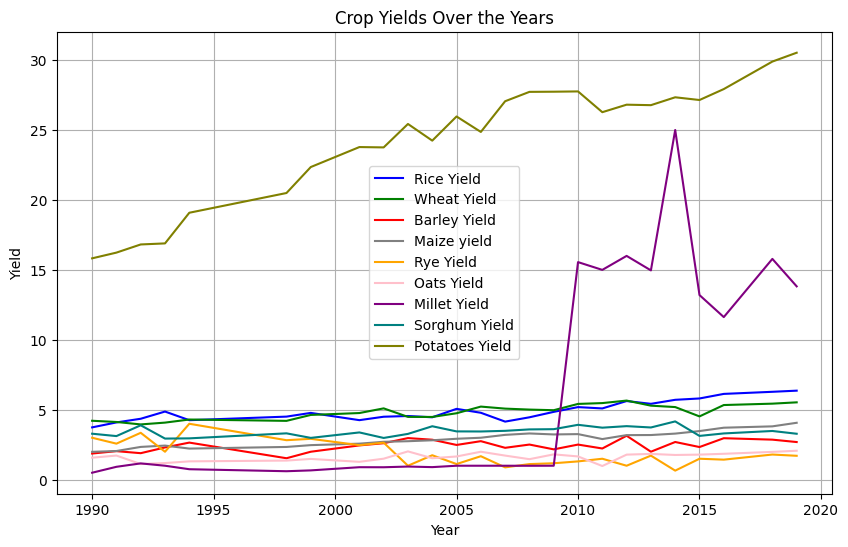

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(Mexico['Year'], Mexico['Rice yield'], label='Rice Yield', color='blue')
plt.plot(Mexico['Year'], Mexico['Wheat yield'], label='Wheat Yield', color='green')
plt.plot(Mexico['Year'], Mexico['Barley yield'], label='Barley Yield', color='red')
plt.plot(Mexico['Year'], Mexico['Maize yield'], label='Maize yield', color='gray')
plt.plot(Mexico['Year'], Mexico['Rye yield'], label='Rye Yield', color='orange')
plt.plot(Mexico['Year'], Mexico['Oats yield'], label='Oats Yield', color='pink')
plt.plot(Mexico['Year'], Mexico['Millet yield'], label='Millet Yield', color='purple')
plt.plot(Mexico['Year'], Mexico['Sorghum yield'], label='Sorghum Yield', color='teal')
plt.plot(Mexico['Year'], Mexico['Potatoes yield'], label='Potatoes Yield', color='olive')

plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Crop Yields Over the Years')
plt.legend()

plt.grid(True)
plt.show()

## Yield Histogram

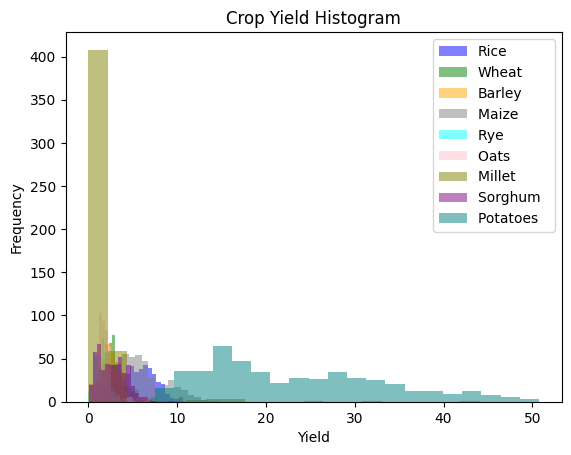

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

# Plot rice yield histogram
plt.hist(data1['Rice yield'], bins=20, alpha=0.5, label='Rice', color='blue')

# Plot wheat yield histogram in same figure
plt.hist(data1['Wheat yield'], bins=20, alpha=0.5, label='Wheat', color='green')


plt.hist(data1['Barley yield'], bins=20, alpha=0.5, label='Barley', color='orange')

plt.hist(data1['Maize yield'], bins=20, alpha=0.5, label='Maize ', color='gray')
plt.hist(data1['Rye yield'], bins=20, alpha=0.5, label='Rye ', color='cyan')
plt.hist(data1['Oats yield'], bins=20, alpha=0.5, label='Oats ', color='pink')
plt.hist(data1['Millet yield'], bins=20, alpha=0.5, label='Millet ', color='olive')
plt.hist(data1['Sorghum yield'], bins=20, alpha=0.5, label='Sorghum  ', color='purple')
plt.hist(data1['Potatoes yield'], bins=20, alpha=0.5, label='Potatoes  ', color='teal')


plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.title('Crop Yield Histogram')
plt.legend()

plt.show()

## READING THE MERGED DATASET

In [ ]:
data = pd.read_csv("/content/final_dataset.csv")

In [ ]:
data.head()

,Unnamed: 0,Entity,Code,Year,fertilizer_quantity,Nitrogen,Potash,Phosphate,Pesticides,Water_resources,Wheat yield,Rice yield,Barley yield,Maize yield,Rye yield,Oats yield,Millet yield,Sorghum yield,Potatoes yield
0,89,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,1.8947,3.6709,2.1934,3.4608,0.8103,1.5403,1.3219,2.8116,20.274700
1,90,Argentina,ARG,1991,322884,95700.0,17100.0,54500.0,26156.0,8820.217,1.8972,4.0294,2.4557,4.0444,0.8103,1.5403,1.5111,3.3320,20.569199
2,91,Argentina,ARG,1992,402269,146600.0,18000.0,83600.0,26156.0,8698.687,2.1809,5.2075,2.5501,4.5237,0.9055,1.3377,1.6138,3.6217,19.903900
3,92,Argentina,ARG,1993,455407,167700.0,19800.0,106400.0,26156.0,8581.360,2.3272,4.3559,2.3105,4.3552,0.7069,1.6143,1.6611,3.9529,21.031399
4,93,Argentina,ARG,1994,633853,281800.0,26400.0,153800.0,30195.0,8466.542,2.0237,4.2989,2.3093,4.2371,0.8626,1.4384,1.4665,3.5065,23.016600


# DATA PREPROCESSING

Using melt function to combine different columns into the single column


In [ ]:

# Assuming df is your DataFrame containing the data
# List of columns related to crop yield
yield_columns = ['Wheat yield', 'Rice yield', 'Barley yield', 'Maize yield', 'Rye yield', 'Oats yield', 'Millet yield', 'Sorghum yield', 'Potatoes yield']

# Columns to keep as identifiers
identifier_columns = ['Entity', 'Code', 'Year', 'fertilizer_quantity', 'Nitrogen', 'Potash', 'Phosphate', 'Pesticides', 'Water_resources']

# Melt the DataFrame to combine yield columns into a single column
df = pd.melt(data, id_vars=identifier_columns, value_vars=yield_columns, var_name='Crop', value_name='Yield')

# Display the combined DataFrame
print(df.head())


      Entity Code  Year  fertilizer_quantity  Nitrogen   Potash  Phosphate  \
0  Argentina  ARG  1990               326054  101400.0  12600.0    51500.0   
1  Argentina  ARG  1991               322884   95700.0  17100.0    54500.0   
2  Argentina  ARG  1992               402269  146600.0  18000.0    83600.0   
3  Argentina  ARG  1993               455407  167700.0  19800.0   106400.0   
4  Argentina  ARG  1994               633853  281800.0  26400.0   153800.0   

   Pesticides  Water_resources         Crop   Yield  
0     26156.0         8946.721  Wheat yield  1.8947  
1     26156.0         8820.217  Wheat yield  1.8972  
2     26156.0         8698.687  Wheat yield  2.1809  
3     26156.0         8581.360  Wheat yield  2.3272  
4     30195.0         8466.542  Wheat yield  2.0237  


In [ ]:
df.head()

,Entity,Code,Year,fertilizer_quantity,Nitrogen,Potash,Phosphate,Pesticides,Water_resources,Crop,Yield
0,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Wheat yield,1.8947
1,Argentina,ARG,1991,322884,95700.0,17100.0,54500.0,26156.0,8820.217,Wheat yield,1.8972
2,Argentina,ARG,1992,402269,146600.0,18000.0,83600.0,26156.0,8698.687,Wheat yield,2.1809
3,Argentina,ARG,1993,455407,167700.0,19800.0,106400.0,26156.0,8581.360,Wheat yield,2.3272
4,Argentina,ARG,1994,633853,281800.0,26400.0,153800.0,30195.0,8466.542,Wheat yield,2.0237


 We want to aggregate the wheat yield for each country, you can use the Pandas library in Python to group by the relevant columns and sum the wheat yield values.

In [ ]:
import pandas as pd

# Assuming df_combined is your DataFrame from the previous step
# Group by relevant columns and aggregate the yield values for each crop
dataset = df.groupby(['Entity', 'Code', 'Year', 'fertilizer_quantity', 'Nitrogen', 'Potash', 'Phosphate', 'Pesticides', 'Water_resources', 'Crop'])['Yield'].sum().reset_index()

# Display the aggregated DataFrame for all crops
print(dataset.head())


      Entity Code  Year  fertilizer_quantity  Nitrogen   Potash  Phosphate  \
0  Argentina  ARG  1990               326054  101400.0  12600.0    51500.0   
1  Argentina  ARG  1990               326054  101400.0  12600.0    51500.0   
2  Argentina  ARG  1990               326054  101400.0  12600.0    51500.0   
3  Argentina  ARG  1990               326054  101400.0  12600.0    51500.0   
4  Argentina  ARG  1990               326054  101400.0  12600.0    51500.0   

   Pesticides  Water_resources            Crop    Yield  
0     26156.0         8946.721    Barley yield   2.1934  
1     26156.0         8946.721     Maize yield   3.4608  
2     26156.0         8946.721    Millet yield   1.3219  
3     26156.0         8946.721      Oats yield   1.5403  
4     26156.0         8946.721  Potatoes yield  20.2747  


In [ ]:
dataset.head(20)

,Entity,Code,Year,fertilizer_quantity,Nitrogen,Potash,Phosphate,Pesticides,Water_resources,Crop,Yield
0,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Barley yield,2.193400
1,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Maize yield,3.460800
2,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Millet yield,1.321900
3,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Oats yield,1.540300
4,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Potatoes yield,20.274700
5,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Rice yield,3.670900
6,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Rye yield,0.810300
7,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Sorghum yield,2.811600
8,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Wheat yield,1.894700
9,Argentina,ARG,1991,322884,95700.0,17100.0,54500.0,26156.0,8820.217,Barley yield,2.455700


# DATASET OVERVIEW

### DATASET BASIC INFORMATION.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               4320 non-null   object 
 1   Code                 4320 non-null   object 
 2   Year                 4320 non-null   int64  
 3   fertilizer_quantity  4320 non-null   int64  
 4   Nitrogen             4320 non-null   float64
 5   Potash               4320 non-null   float64
 6   Phosphate            4320 non-null   float64
 7   Pesticides           4320 non-null   float64
 8   Water_resources      4320 non-null   float64
 9   Crop                 4320 non-null   object 
 10  Yield                4320 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 371.4+ KB


###  Summary Statistics for Numerical Variables

In [ ]:
dataset.describe()

,Year,fertilizer_quantity,Nitrogen,Potash,Phosphate,Pesticides,Water_resources,Yield
count,4320.000000,4.320000e+03,4.320000e+03,4.320000e+03,4.320000e+03,4320.000000,4320.000000,4320.000000
mean,2005.800000,5.374645e+06,2.859982e+06,7.796470e+05,1.134625e+06,69437.720875,6504.243163,5.328655
std,8.332981,1.171429e+07,6.555956e+06,1.915773e+06,2.621828e+06,110986.010401,8130.887160,7.520009
min,1990.000000,1.445900e+04,4.210530e+03,0.000000e+00,3.250000e+00,85.000000,578.369700,0.020000
25%,1999.000000,3.494288e+05,1.816430e+05,2.575000e+04,5.373175e+04,8133.877500,1204.446875,1.665450
50%,2007.000000,1.222419e+06,4.770665e+05,1.071412e+05,2.490790e+05,26857.000000,3015.776950,2.670750
75%,2013.000000,2.656790e+06,1.262970e+06,2.844116e+05,5.978640e+05,59268.500000,8050.996550,5.144925
max,2019.000000,5.809684e+07,3.098167e+07,1.172799e+07,1.425946e+07,434540.750000,30208.270000,50.752197


### Summary Statistics for Categorical Variables

In [ ]:
dataset.describe(include='object')

,Entity,Code,Crop
count,4320,4320,4320
unique,20,20,9
top,Argentina,ARG,Barley yield
freq,270,270,480


Categorical Features (object data type):

ENTITY/CODE: There are 20 unique countries/areas, with ARG being the most frequent category, occurring 270 times out of 4320 entries.
CROP: 9 unique types of crops are present. The most common type is "Barley", occuring 480 times.

### Checking the unique items in code/entity, year and crop.

In [ ]:

# Assuming df is your DataFrame
unique_codes = dataset['Entity'].unique()

# Display the unique codes
print(unique_codes)


['Argentina' 'Australia' 'Azerbaijan' 'Bulgaria' 'China' 'France' 'Greece'
 'Hungary' 'Kazakhstan' 'Kyrgyzstan' 'Mexico' 'Morocco' 'North Macedonia'
 'Russia' 'South Africa' 'Spain' 'Tajikistan' 'Turkey' 'Ukraine'
 'United States']


In [ ]:
# Assuming df is your DataFrame
unique_years = dataset['Year'].unique()

# Display the unique codes
print(unique_years)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [ ]:
# Assuming df is your DataFrame
unique_crops = dataset['Crop'].unique()

# Display the unique codes
print(unique_crops)

['Barley yield' 'Maize yield' 'Millet yield' 'Oats yield' 'Potatoes yield'
 'Rice yield' 'Rye yield' 'Sorghum yield' 'Wheat yield']


## Correlation and Heatmap

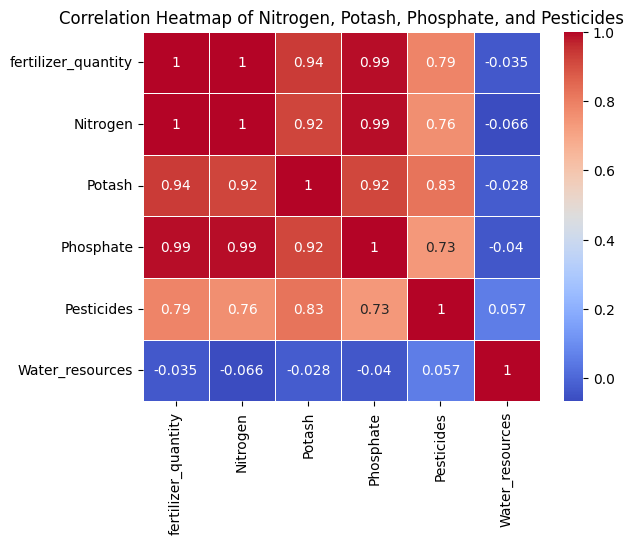

In [ ]:
# Assuming df is your DataFrame containing the data
df_factors = dataset[['fertilizer_quantity','Nitrogen', 'Potash', 'Phosphate', 'Pesticides','Water_resources']]

# Compute the correlation matrix
correlation_matrix = df_factors.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Nitrogen, Potash, Phosphate, and Pesticides')
plt.show()


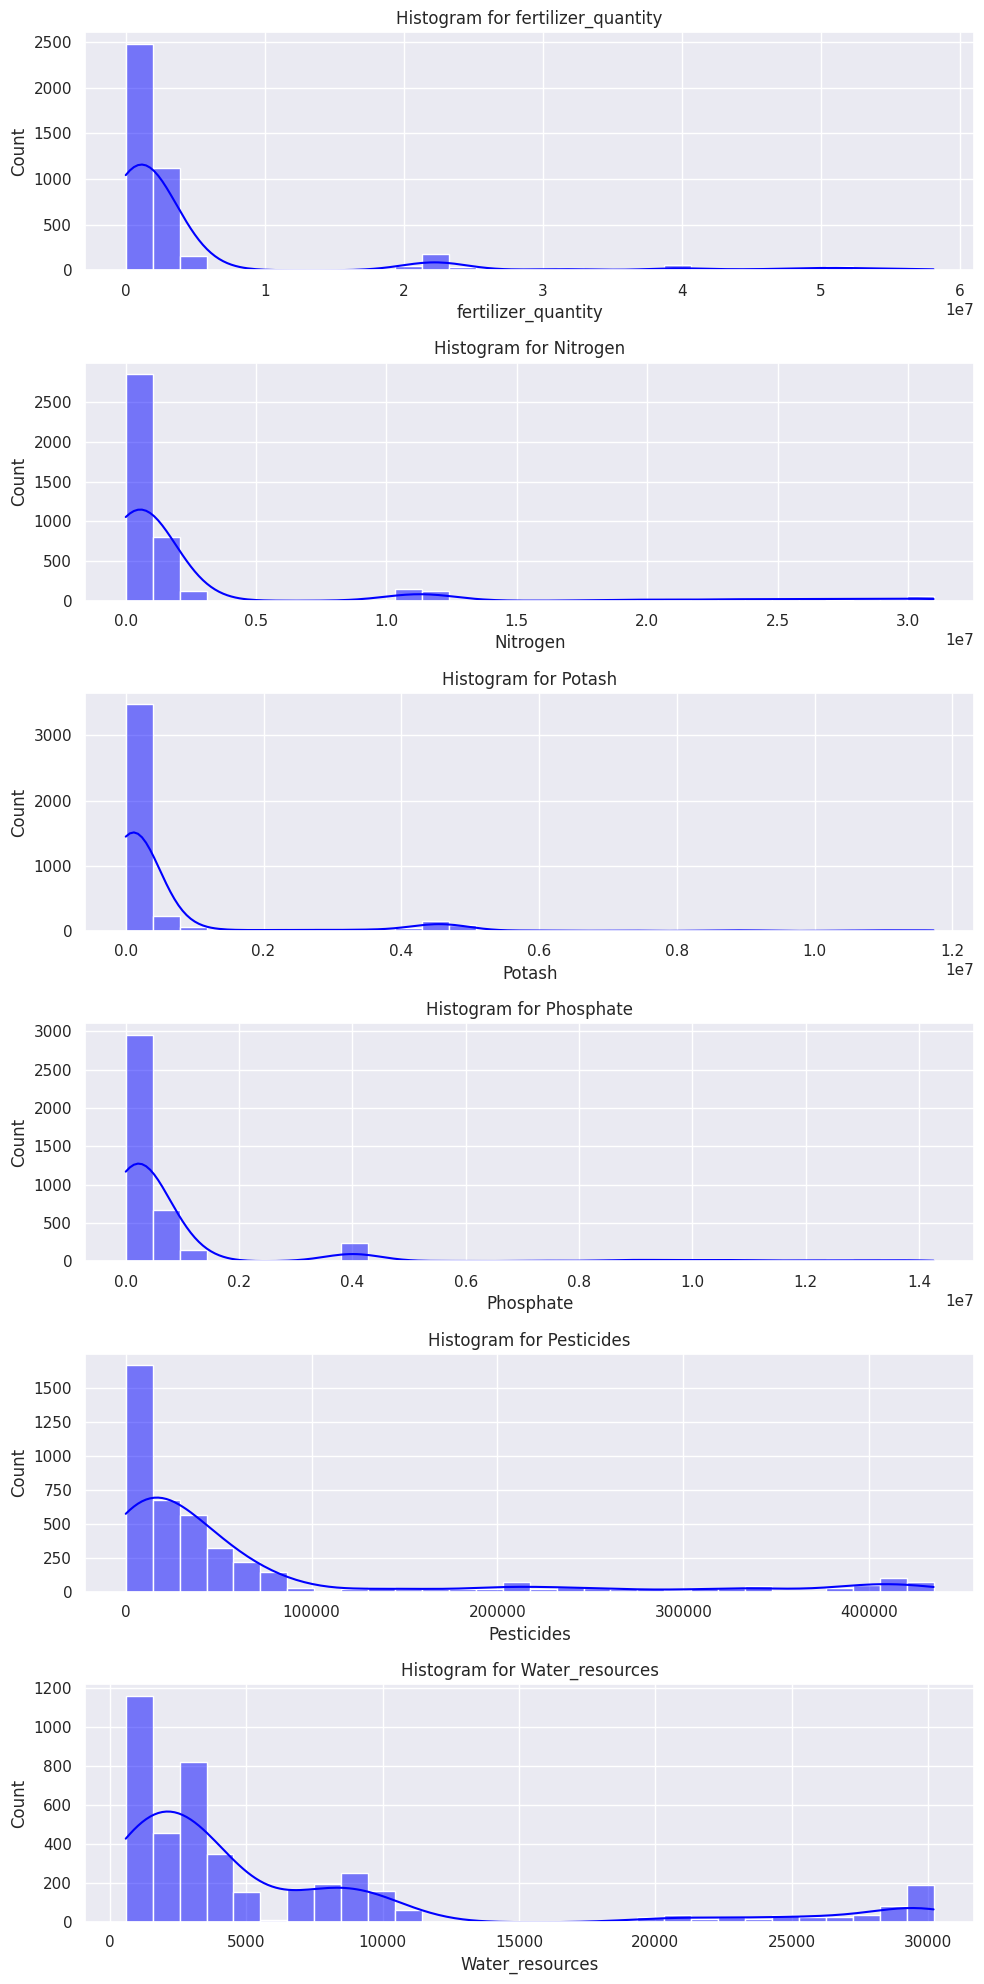

In [ ]:
import seaborn as sns
sns.set(palette='coolwarm')
numerical_columns = ['fertilizer_quantity', 'Nitrogen', 'Potash', 'Phosphate', 'Pesticides', 'Water_resources']

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 20))

for i, col in enumerate(numerical_columns):
    sns.histplot(data=dataset, x=col, kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f'Histogram for {col}')

plt.tight_layout()
plt.show() # shows the distribution values.

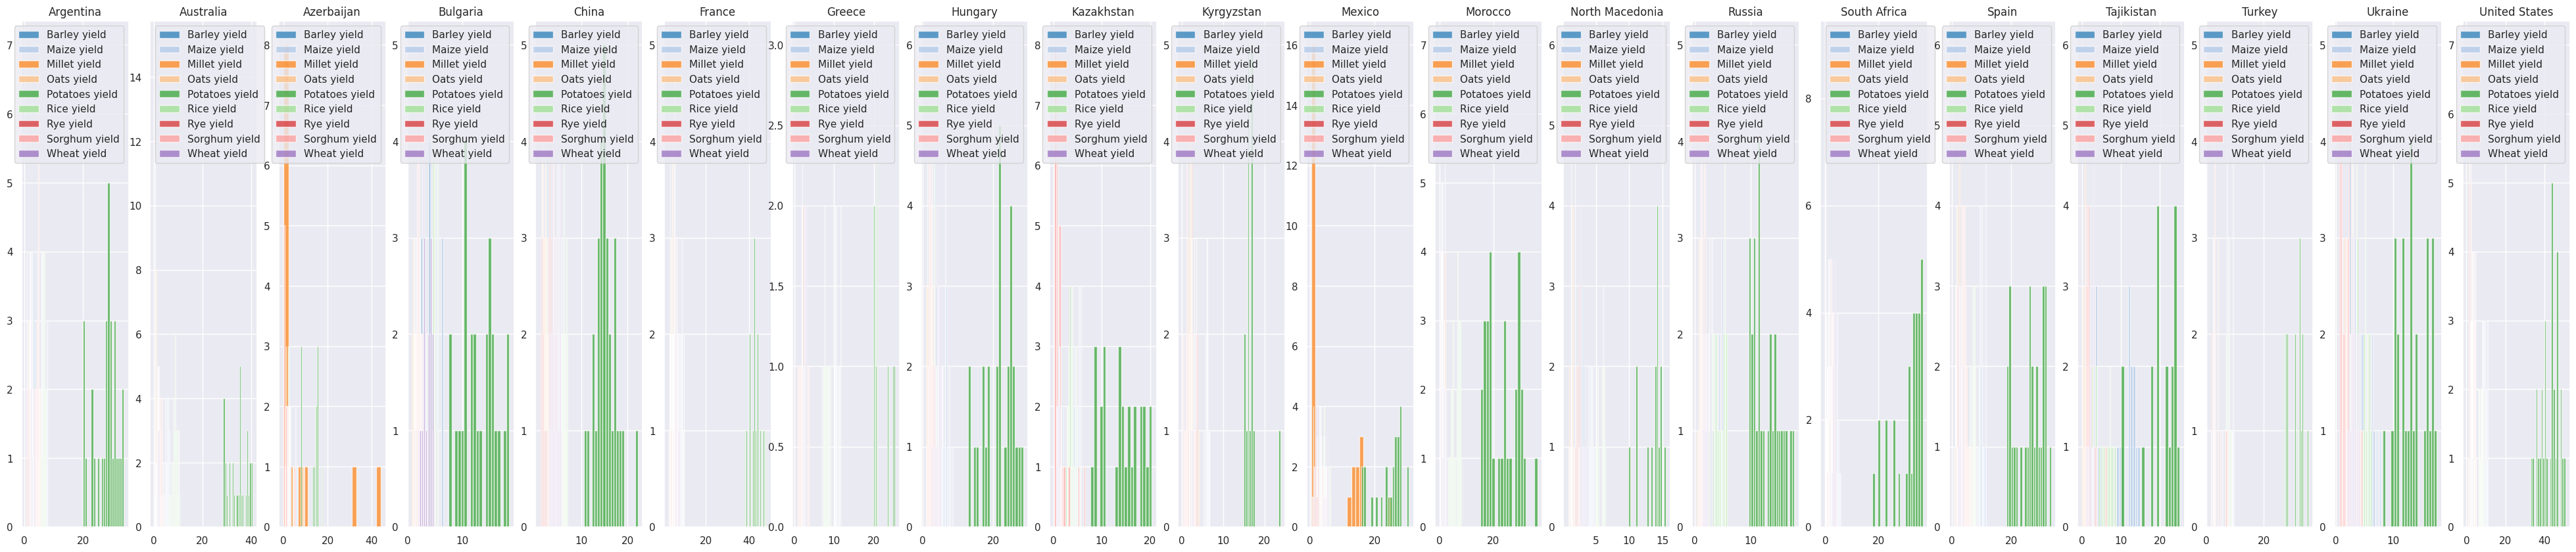

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette('tab20', 21, as_cmap=True)
num_plots = 20  # Assuming you want a plot for each entity
areas_per_plot = 1  # Since you want detailed graphs for each entity

# Get unique areas
unique_areas = sorted(dataset['Entity'].unique())

# Split into chunks (each chunk containing one area)
area_chunks = [unique_areas[i:i + areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]

fig, axs = plt.subplots(ncols=num_plots, figsize=(50,10))
for i, ax in enumerate(axs):
    if i < len(area_chunks):
        area = area_chunks[i][0]  # Extract the single area from the chunk
        plot_df = dataset[dataset['Entity'] == area]

        for crop_idx, crop in enumerate(plot_df['Crop'].unique()):
            data = plot_df[plot_df['Crop'] == crop]
            ax.hist(data['Yield'], bins=20, alpha=0.7, label=crop, color=palette(crop_idx))

        ax.set_title(f'{area}')
        ax.legend()

plt.show() # x-axis is crop yield and y-axis is the frequency in each yield bin.


In [ ]:
for i in range(0,7):
    plot_df = dataset[dataset['Entity'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Entity','Crop'])['Yield'].mean().to_frame()
    dg=dk.sort_values(by=['Yield'],ascending=True)
    display(dg.head()) #least is rye yield in argentina

Yield
Entity    Crop                  
Argentina Rye yield     1.309480
          Millet yield  1.563810
          Oats yield    1.767757
          Wheat yield   2.536357
          Barley yield  2.992640

Yield
Entity    Crop                  
Australia Rye yield     0.630357
          Millet yield  1.024380
          Oats yield    1.538110
          Wheat yield   1.766283
          Barley yield  1.896937

Yield
Entity     Crop                   
Azerbaijan Rye yield      1.815892
           Sorghum yield  1.918046
           Oats yield     1.964231
           Barley yield   2.320308
           Wheat yield    2.587754

Yield
Entity   Crop                   
Bulgaria Millet yield   1.299944
         Rye yield      1.704374
         Oats yield     1.705218
         Sorghum yield  2.117570
         Barley yield   3.212722

Yield
Entity Crop                   
China  Millet yield   2.114220
       Rye yield      2.328673
       Oats yield     2.626537
       Barley yield   3.315627
       Sorghum yield  4.108003

Yield
Entity Crop                   
France Millet yield   3.530718
       Rye yield      4.671853
       Oats yield     4.899935
       Rice yield     5.299694
       Sorghum yield  5.612253

Yield
Entity Crop                   
Greece Millet yield   1.947683
       Oats yield     2.081175
       Sorghum yield  2.096642
       Rye yield      2.223867
       Barley yield   2.679342

In [ ]:
for i in range(0,7):
    plot_df = dataset[dataset['Entity'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Entity','Crop'])['Yield'].mean().to_frame()
    dg=dk.sort_values(by=['Yield'],ascending=False)
    display(dg.head()) # Highest is argentina potato yield in one group.

Yield
Entity    Crop                     
Argentina Potatoes yield  27.719456
          Maize yield      5.919693
          Rice yield       5.821543
          Sorghum yield    4.311480
          Barley yield     2.992640

Yield
Entity    Crop                     
Australia Potatoes yield  34.399913
          Rice yield       8.924173
          Maize yield      5.673670
          Sorghum yield    2.661300
          Barley yield     1.896937

Yield
Entity     Crop                     
Azerbaijan Potatoes yield  13.430269
           Millet yield     7.934208
           Maize yield      5.097461
           Rice yield       2.589277
           Wheat yield      2.587754

Yield
Entity   Crop                     
Bulgaria Potatoes yield  13.110574
         Rice yield       4.398093
         Maize yield      4.241737
         Wheat yield      3.444093
         Barley yield     3.212722

Yield
Entity Crop                     
China  Potatoes yield  15.299683
       Rice yield       6.384650
       Maize yield      5.266650
       Wheat yield      4.341800
       Sorghum yield    4.108003

Yield
Entity Crop                     
France Potatoes yield  42.799622
       Maize yield      8.867129
       Wheat yield      6.955053
       Barley yield     6.313223
       Sorghum yield    5.612253

Yield
Entity Crop                     
Greece Potatoes yield  21.674458
       Maize yield     10.749458
       Rice yield       7.979575
       Wheat yield      2.688500
       Barley yield     2.679342

In [ ]:
dk=dataset.groupby(['Entity','Crop'])['Yield'].mean().to_frame()
dk.sort_values(by=['Yield'],ascending=False) #top production is france that is potato and least is south africa rye and millet.

,,Yield
Entity,Crop,
France,Potatoes yield,42.799622
United States,Potatoes yield,42.513002
Australia,Potatoes yield,34.399913
South Africa,Potatoes yield,31.092879
Turkey,Potatoes yield,30.663287
...,...,...
Morocco,Maize yield,0.708497
Kazakhstan,Millet yield,0.699979
Australia,Rye yield,0.630357


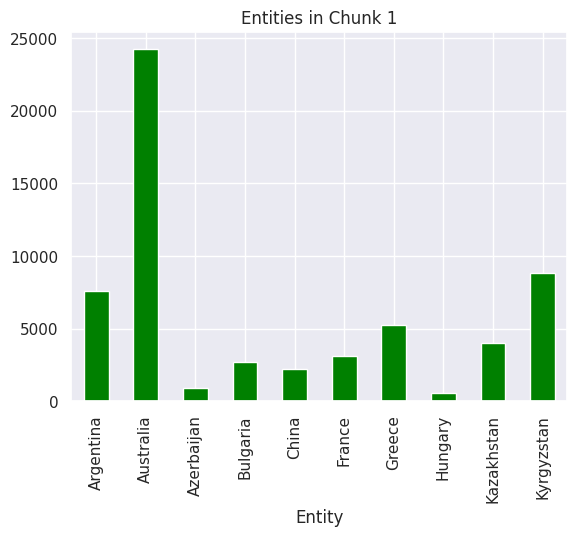

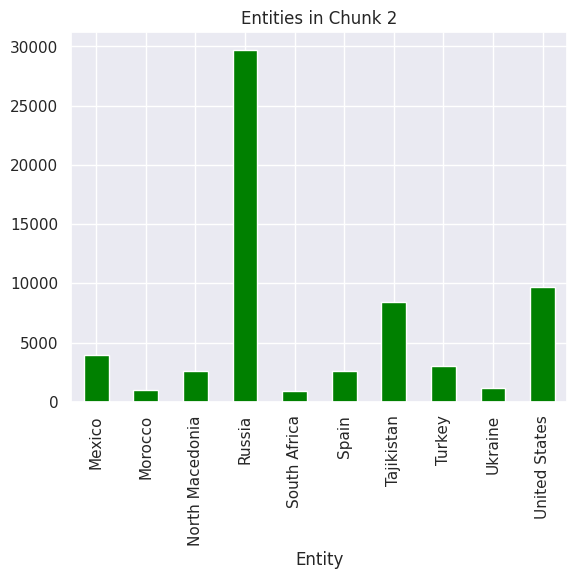

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette('tab20', 21, as_cmap=True)
num_plots = 2  # Assuming you want a plot for each entity
areas_per_plot = 10  # Since you want detailed graphs for each entity

# Get unique areas
unique_areas = sorted(dataset['Entity'].unique())

# Ensure that num_plots is less than or equal to the length of area_chunks
num_plots = min(num_plots, len(unique_areas))

# Split into chunks (each chunk containing areas_per_plot entities)
area_chunks = [unique_areas[i:i + areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]

for i in range(num_plots):
        plot_df = dataset[dataset['Entity'].isin(area_chunks[i])]
        plot_df.groupby(['Entity'])['Water_resources'].mean().plot(kind='bar', rot=0, color='green')
        plt.xticks(rotation=90)
        plt.title(f'Entities in Chunk {i + 1}')
        plt.show()



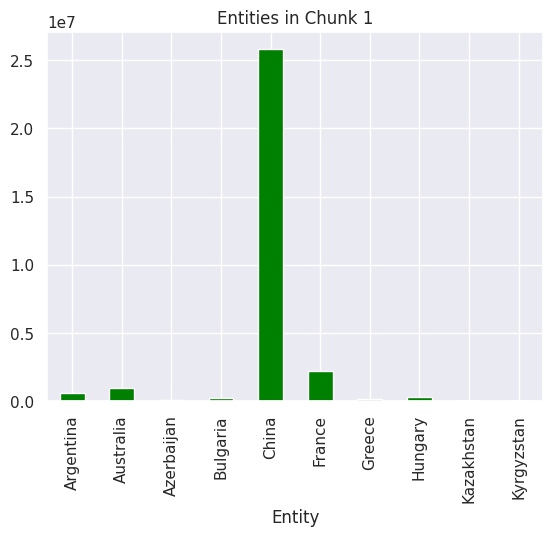

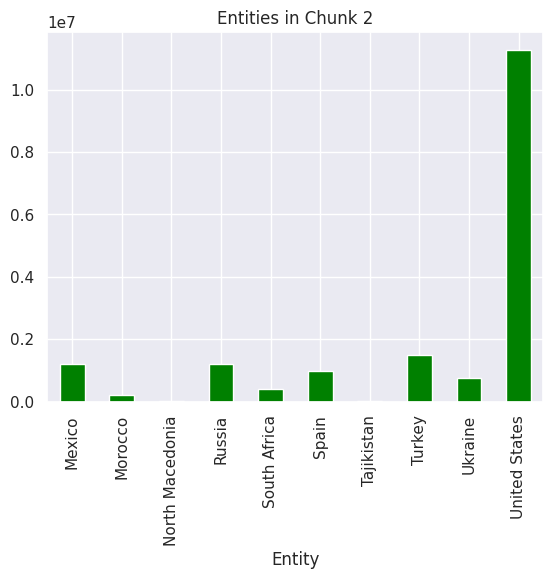

In [ ]:
 #'Nitrogen', 'Potash', 'Phosphate', 'Pesticides','Water_resources'
for i in range(num_plots):
        plot_df = dataset[dataset['Entity'].isin(area_chunks[i])]
        plot_df.groupby(['Entity'])['Nitrogen'].mean().plot(kind='bar', rot=0, color='green')
        plt.xticks(rotation=90)
        plt.title(f'Entities in Chunk {i + 1}')
        plt.show()

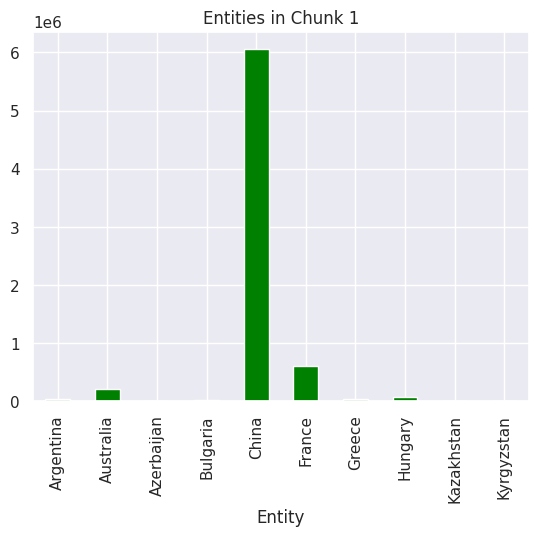

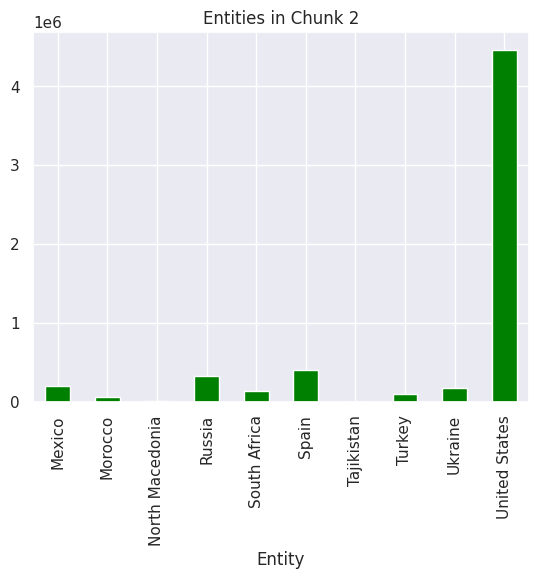

In [ ]:
for i in range(num_plots):
        plot_df = dataset[dataset['Entity'].isin(area_chunks[i])]
        plot_df.groupby(['Entity'])['Potash'].mean().plot(kind='bar', rot=0, color='green')
        plt.xticks(rotation=90)
        plt.title(f'Entities in Chunk {i + 1}')
        plt.show()

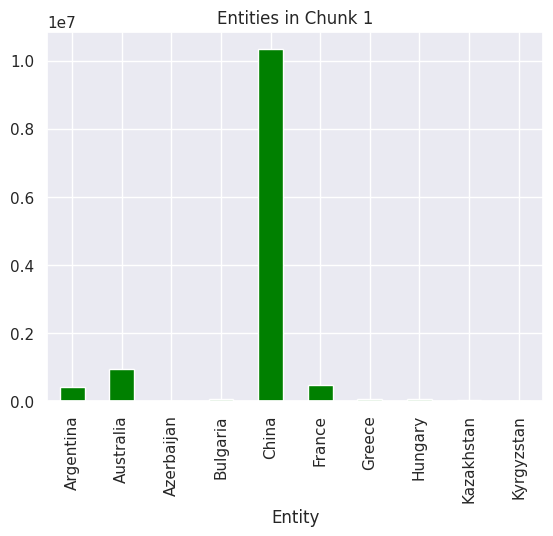

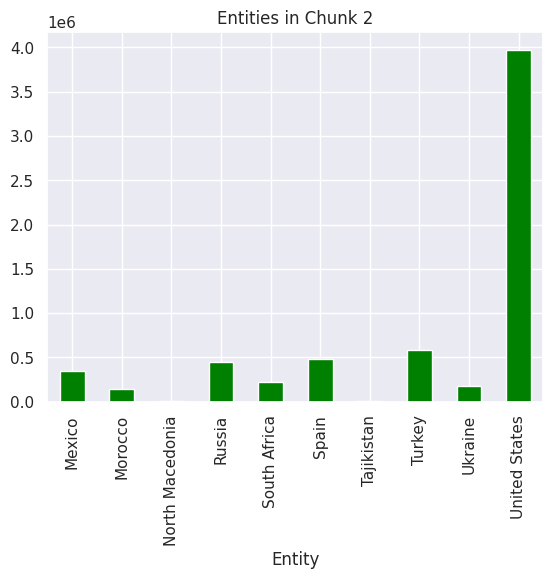

In [ ]:
for i in range(num_plots):
        plot_df = dataset[dataset['Entity'].isin(area_chunks[i])]
        plot_df.groupby(['Entity'])['Phosphate'].mean().plot(kind='bar', rot=0, color='green')
        plt.xticks(rotation=90)
        plt.title(f'Entities in Chunk {i + 1}')
        plt.show()

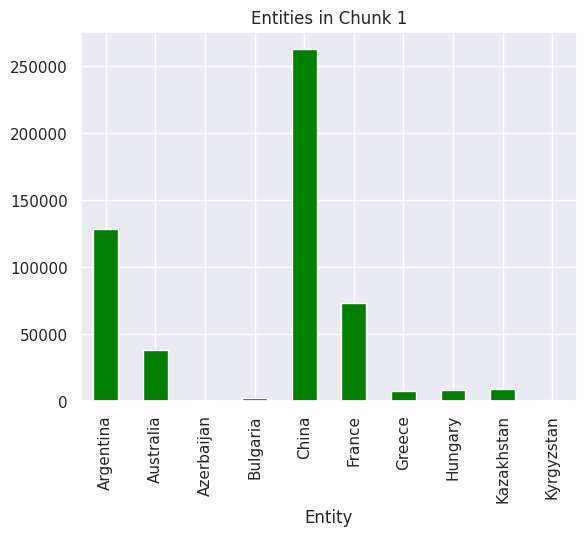

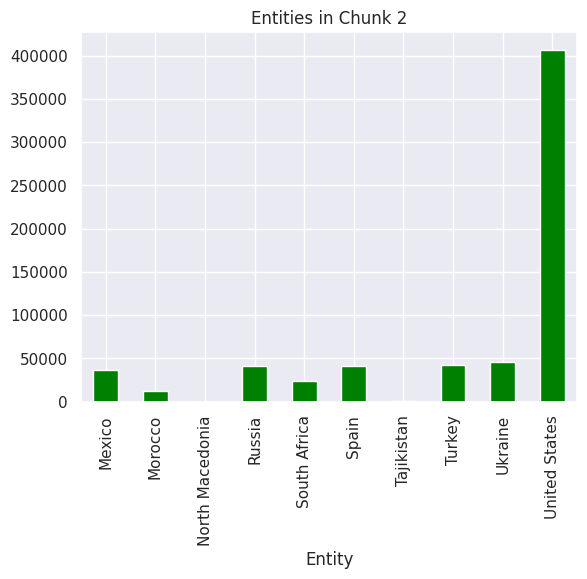

In [ ]:
for i in range(num_plots):
        plot_df = dataset[dataset['Entity'].isin(area_chunks[i])]
        plot_df.groupby(['Entity'])['Pesticides'].mean().plot(kind='bar', rot=0, color='green')
        plt.xticks(rotation=90)
        plt.title(f'Entities in Chunk {i + 1}')
        plt.show()

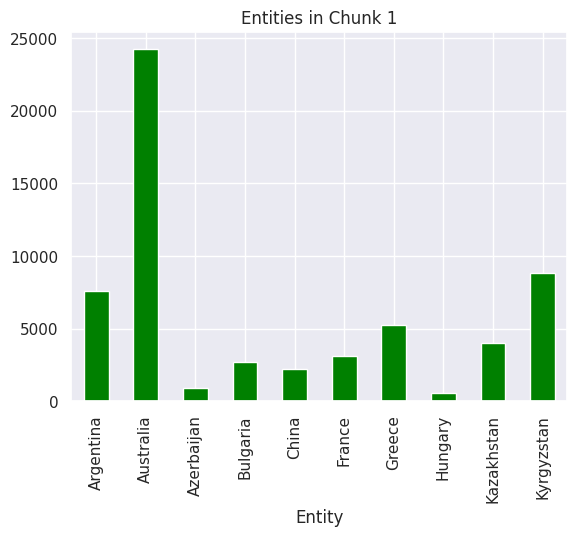

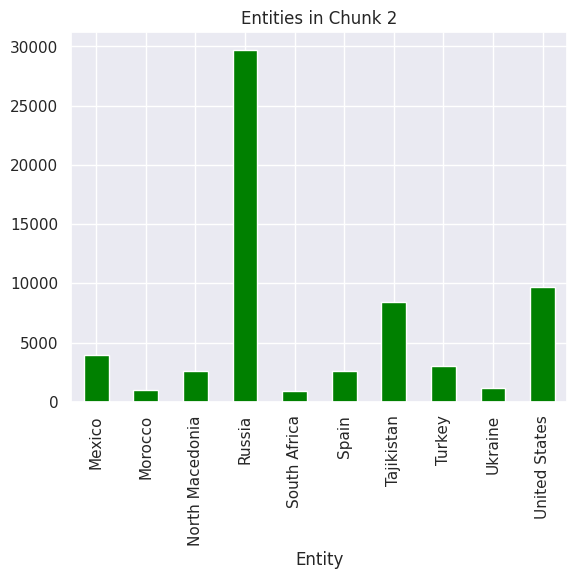

In [ ]:
for i in range(num_plots):
        plot_df = dataset[dataset['Entity'].isin(area_chunks[i])]
        plot_df.groupby(['Entity'])['Water_resources'].mean().plot(kind='bar', rot=0, color='green')
        plt.xticks(rotation=90)
        plt.title(f'Entities in Chunk {i + 1}')
        plt.show()

## Using the scaling techniques for the comparision.

## Fertilizer effect on yeild.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming df is your DataFrame
fertilizer_quantity_values = dataset['fertilizer_quantity'].values.reshape(-1, 1)
yield_values = dataset['Yield'].values.reshape(-1, 1)

# Min-Max Scaling (Normalization)
min_max_scaler = MinMaxScaler()
df['Normalized_fertilizer'] = min_max_scaler.fit_transform(fertilizer_quantity_values)

# Z-score Standardization
standard_scaler = StandardScaler()
df['Standardized_fertilizer'] = standard_scaler.fit_transform(fertilizer_quantity_values)

# You can repeat the same process for the 'Yield' column
df['Normalized_Yield'] = min_max_scaler.fit_transform(yield_values)
df['Standardized_Yield'] = standard_scaler.fit_transform(yield_values)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming df is your DataFrame
fertilizer_quantity_values = dataset['fertilizer_quantity'].values.reshape(-1, 1)
yield_values = dataset['Yield'].values.reshape(-1, 1)
pesticides_values = dataset['Pesticides'].values.reshape(-1, 1)

# Min-Max Scaling (Normalization)
min_max_scaler = MinMaxScaler()
dataset['Normalized_fertilizer'] = min_max_scaler.fit_transform(fertilizer_quantity_values)

# Z-score Standardization
standard_scaler = StandardScaler()
dataset['Standardized_fertilizer'] = standard_scaler.fit_transform(fertilizer_quantity_values)

# You can repeat the same process for the 'Yield' column
dataset['Normalized_Yield'] = min_max_scaler.fit_transform(yield_values)
dataset['Standardized_Yield'] = standard_scaler.fit_transform(yield_values)
dataset['Normalized_pesticides'] = min_max_scaler.fit_transform(pesticides_values)
dataset['Standardized_pesticides'] = standard_scaler.fit_transform(pesticides_values)



In [ ]:
dataset.head()

,Entity,Code,Year,fertilizer_quantity,Nitrogen,Potash,Phosphate,Pesticides,Water_resources,Crop,Yield,Normalized_fertilizer,Standardized_fertilizer,Normalized_Yield,Standardized_Yield,Normalized_pesticides,Standardized_pesticides
0,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Barley yield,2.1934,0.005365,-0.431027,0.042841,-0.416970,0.060008,-0.39002
1,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Maize yield,3.4608,0.005365,-0.431027,0.067823,-0.248413,0.060008,-0.39002
2,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Millet yield,1.3219,0.005365,-0.431027,0.025662,-0.532874,0.060008,-0.39002
3,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Oats yield,1.5403,0.005365,-0.431027,0.029967,-0.503828,0.060008,-0.39002
4,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Potatoes yield,20.2747,0.005365,-0.431027,0.399247,1.987734,0.060008,-0.39002


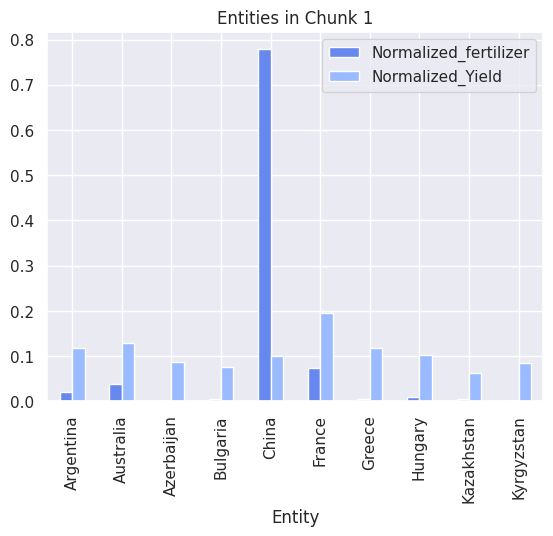

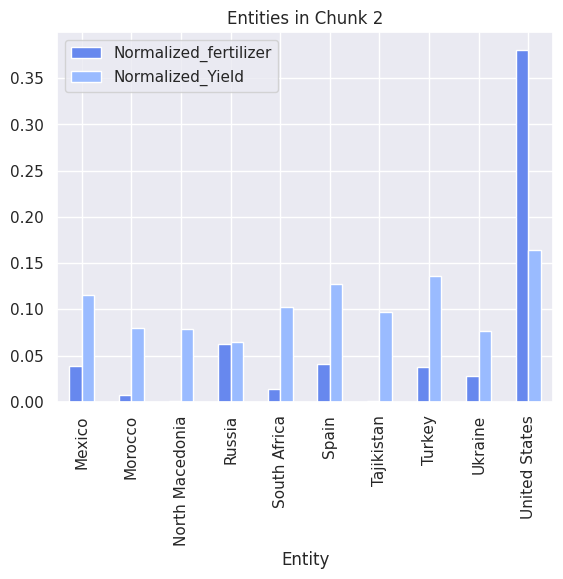

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
num_plots = 2
areas_per_plot = 10

# Get unique areas
unique_areas = sorted(dataset['Entity'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i + areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]

for i in range(num_plots):
    if i < len(area_chunks):
        plot_df = dataset[dataset['Entity'].isin(area_chunks[i])]
        plot_df.groupby('Entity')[['Normalized_fertilizer', 'Normalized_Yield']].mean().plot(kind='bar', rot=0)
        plt.xticks(rotation=90)
        plt.title(f'Entities in Chunk {i + 1}')
        plt.show()
    else:
        print(f"Not enough data for chunk {i + 1}")


In [ ]:
import plotly.express as px
import seaborn as sns

# Assuming df is your DataFrame
new_color_palette = sns.color_palette('Oranges', n_colors=len(dataset['Entity'].unique()))

fig = px.scatter(dataset, x='Yield', y='fertilizer_quantity', color='Entity', color_discrete_sequence=new_color_palette)
fig.show()


# Pesticides effects on yeild.

In [ ]:
dataset.head()

,Entity,Code,Year,fertilizer_quantity,Nitrogen,Potash,Phosphate,Pesticides,Water_resources,Crop,Yield,Normalized_fertilizer,Standardized_fertilizer,Normalized_Yield,Standardized_Yield,Normalized_pesticides,Standardized_pesticides
0,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Barley yield,2.1934,0.005365,-0.431027,0.042841,-0.416970,0.060008,-0.39002
1,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Maize yield,3.4608,0.005365,-0.431027,0.067823,-0.248413,0.060008,-0.39002
2,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Millet yield,1.3219,0.005365,-0.431027,0.025662,-0.532874,0.060008,-0.39002
3,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Oats yield,1.5403,0.005365,-0.431027,0.029967,-0.503828,0.060008,-0.39002
4,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,Potatoes yield,20.2747,0.005365,-0.431027,0.399247,1.987734,0.060008,-0.39002


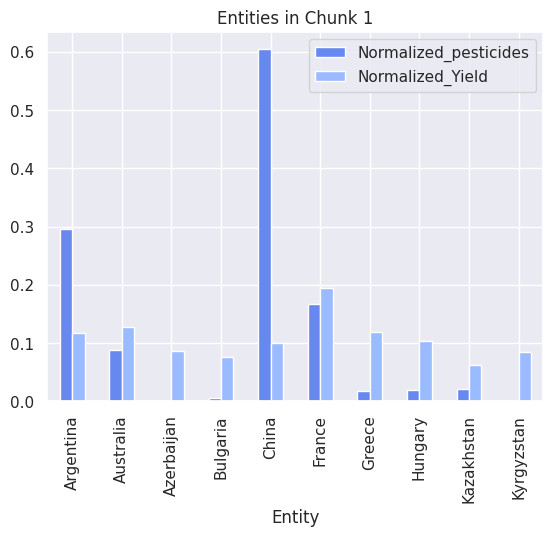

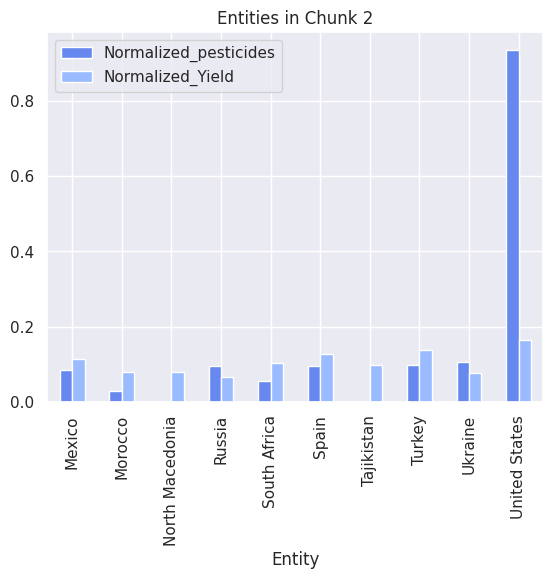

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
num_plots = 2
areas_per_plot = 10

# Get unique areas
unique_areas = sorted(dataset['Entity'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i + areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]

for i in range(num_plots):
    if i < len(area_chunks):
        plot_df = dataset[dataset['Entity'].isin(area_chunks[i])]
        plot_df.groupby('Entity')[['Normalized_pesticides', 'Normalized_Yield']].mean().plot(kind='bar', rot=0)
        plt.xticks(rotation=90)
        plt.title(f'Entities in Chunk {i + 1}')
        plt.show()
    else:
        print(f"Not enough data for chunk {i + 1}")


From the graph, the main insight is that with less use of pesticides we get better yield. China with most usage of pesticides get less yeild.

In [ ]:
final_data = pd.read_csv("/content/final_dataset.csv")
final_data.drop(columns=['Unnamed: 0'], inplace=True)
final_data

,Entity,Code,Year,fertilizer_quantity,Nitrogen,Potash,Phosphate,Pesticides,Water_resources,Wheat yield,Rice yield,Barley yield,Maize yield,Rye yield,Oats yield,Millet yield,Sorghum yield,Potatoes yield
0,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.7210,1.8947,3.670900,2.1934,3.460800,0.8103,1.5403,1.3219,2.8116,20.274700
1,Argentina,ARG,1991,322884,95700.0,17100.0,54500.0,26156.0,8820.2170,1.8972,4.029400,2.4557,4.044400,0.8103,1.5403,1.5111,3.3320,20.569199
2,Argentina,ARG,1992,402269,146600.0,18000.0,83600.0,26156.0,8698.6870,2.1809,5.207500,2.5501,4.523700,0.9055,1.3377,1.6138,3.6217,19.903900
3,Argentina,ARG,1993,455407,167700.0,19800.0,106400.0,26156.0,8581.3600,2.3272,4.355900,2.3105,4.355200,0.7069,1.6143,1.6611,3.9529,21.031399
4,Argentina,ARG,1994,633853,281800.0,26400.0,153800.0,30195.0,8466.5420,2.0237,4.298900,2.3093,4.237100,0.8626,1.4384,1.4665,3.5065,23.016600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,United States,USA,2015,22463328,11829381.0,4437563.0,3944392.0,407779.2,8785.9600,2.9299,8.372200,3.7083,10.569212,2.0043,2.5168,1.8983,4.7709,46.899998
476,United States,USA,2016,23139263,11644829.0,4498031.5,3948544.0,407779.2,8722.5205,3.5408,8.112100,4.1931,10.958341,1.7458,2.3677,2.0448,4.8912,48.640800
477,United States,USA,2017,23439050,11581693.0,4554114.0,4009797.8,407779.2,8667.5120,3.1175,8.414700,3.9283,11.083865,2.1449,2.2120,2.0705,4.5031,48.388700
478,United States,USA,2018,21682980,11627053.0,4408963.0,3982581.8,407779.2,8622.0030,3.2005,8.621300,4.1674,11.071312,1.9386,2.3274,1.6662,4.5266,49.727398


In [ ]:
new_data = final_data

In [ ]:
new_data.head()

,Entity,Code,Year,fertilizer_quantity,Nitrogen,Potash,Phosphate,Pesticides,Water_resources,Wheat yield,Rice yield,Barley yield,Maize yield,Rye yield,Oats yield,Millet yield,Sorghum yield,Potatoes yield
0,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,1.8947,3.6709,2.1934,3.4608,0.8103,1.5403,1.3219,2.8116,20.274700
1,Argentina,ARG,1991,322884,95700.0,17100.0,54500.0,26156.0,8820.217,1.8972,4.0294,2.4557,4.0444,0.8103,1.5403,1.5111,3.3320,20.569199
2,Argentina,ARG,1992,402269,146600.0,18000.0,83600.0,26156.0,8698.687,2.1809,5.2075,2.5501,4.5237,0.9055,1.3377,1.6138,3.6217,19.903900
3,Argentina,ARG,1993,455407,167700.0,19800.0,106400.0,26156.0,8581.360,2.3272,4.3559,2.3105,4.3552,0.7069,1.6143,1.6611,3.9529,21.031399
4,Argentina,ARG,1994,633853,281800.0,26400.0,153800.0,30195.0,8466.542,2.0237,4.2989,2.3093,4.2371,0.8626,1.4384,1.4665,3.5065,23.016600


# Model Selection and Comparision.

## 1. Using multi linear regression for the yield data and find the coefficient for prediction.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Select independent variable
X = final_data['Year'].values.reshape(-1, 1)

# Target variables
yield_cols = ['Wheat yield', 'Rice yield', 'Barley yield', 'Maize yield', 'Rye yield', 'Oats yield', 'Millet yield', 'Sorghum yield', 'Potatoes yield']

# Fit regression model for each yield
models = {}
for col in yield_cols:
    lr = LinearRegression()
    lr.fit(X, final_data[col])
    models[col] = lr

# Print model coefficients
for target, model in models.items():
    print(f'Coefficients for predicting {target}:')
    print(f'Year: {model.coef_[0]}')

Coefficients for predicting Wheat yield:
Year: 0.0398868426703038
Coefficients for predicting Rice yield:
Year: 0.07364322623789117
Coefficients for predicting Barley yield:
Year: 0.03338976691934652
Coefficients for predicting Maize yield:
Year: 0.1415691770651926
Coefficients for predicting Rye yield:
Year: 0.03379813543314487
Coefficients for predicting Oats yield:
Year: 0.02457311191118394
Coefficients for predicting Millet yield:
Year: 0.08477009640402364
Coefficients for predicting Sorghum yield:
Year: 0.024726697389198988
Coefficients for predicting Potatoes yield:
Year: 0.3431888449181943


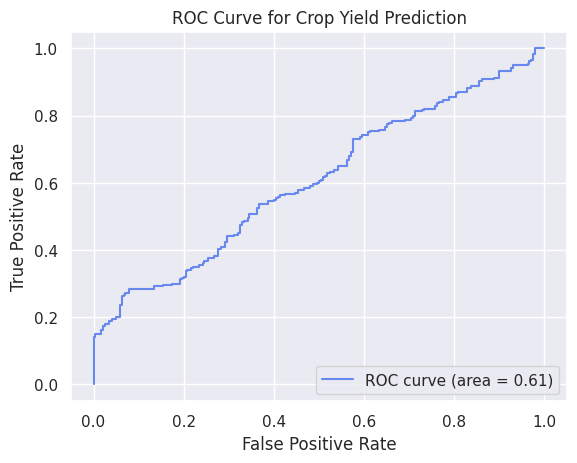

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Select independent variables
X = final_data[['Year', 'fertilizer_quantity']]

# Categorize dependent variable into binary classes
y = (final_data['Wheat yield'] > final_data['Wheat yield'].median()).astype(int)

# Use logistic regression for binary classification
reg = LogisticRegression()
reg.fit(X, y)

# Make predictions
y_pred = reg.predict_proba(X)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Crop Yield Prediction')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

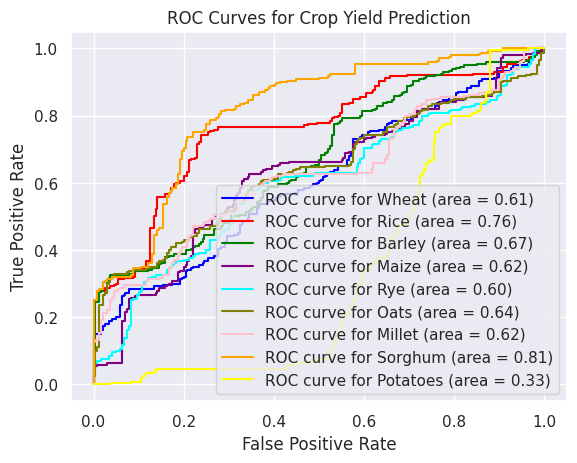

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Create ROC curves for multiple crops

crops = ['Wheat', 'Rice', 'Barley', 'Maize', 'Rye', 'Oats', 'Millet', 'Sorghum', 'Potatoes']
colors = ['blue', 'red', 'green', 'purple','cyan','olive','pink','orange','yellow']

for i, crop in enumerate(crops):
    # Select independent variables
    X = final_data[['Year', 'fertilizer_quantity']]

    # Categorize dependent variable into binary classes
    y = (final_data[f'{crop} yield'] > final_data[f'{crop} yield'].median()).astype(int)

    # Use logistic regression for binary classification
    reg = LogisticRegression()
    reg.fit(X, y)

    # Make predictions
    y_pred = reg.predict_proba(X)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'ROC curve for {crop} (area = %0.2f)' % roc_auc, color=colors[i])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Crop Yield Prediction')
plt.legend(loc="lower right")
plt.show()


## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks. It's a simple yet powerful algorithm that can be used for both classification and regression, depending on how it's configured. KNN makes predictions based on how similar the data points are in the feature space. The "k" in KNN refers to the number of nearest neighbors the algorithm considers to make predictions. Here's a brief overview of how KNN works:
Training Phase: During the training phase, KNN simply stores the entire training dataset in memory, along with their associated labels (in the case of classification) or target values (in the case of regression). Prediction Phase: To make a prediction for a new, unseen data point, KNN calculates the distances (e.g., Euclidean distance) between that point and all data points in the training set. It then selects the "k" nearest neighbors based on the calculated distances. For classification, KNN takes a majority vote from the k neighbors to determine the class label of the new data point. For regression, it calculates the average of the target values of the k neighbors to predict the target value of the new data point.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X = final_data[['Year', 'fertilizer_quantity', 'Nitrogen', 'Potash', 'Phosphate', 'Pesticides']]
y = final_data['Wheat yield']  # Replace with the crop yield you want to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN regression model
k = 5  # Choose the number of neighbors (k) as needed
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.8129241361030592


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame 'data' with columns for various crop yields and other features

# List of crop yields to predict
crop_yields = ['Wheat yield', 'Rice yield', 'Barley yield', 'Maize yield', 'Rye yield', 'Oats yield', 'Millet yield', 'Sorghum yield', 'Potatoes yield']

# Features
X = final_data[['Year', 'fertilizer_quantity', 'Nitrogen', 'Potash', 'Phosphate', 'Pesticides']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, final_data[crop_yields], test_size=0.2, random_state=42)

# Create and train KNN regression models for each crop yield
k = 5  # Choose the number of neighbors (k) as needed

knn_models = {}
for yield_column in crop_yields:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train[yield_column])
    knn_models[yield_column] = knn_model

# Make predictions for each crop yield
predictions = {}
for yield_column in crop_yields:
    y_pred = knn_models[yield_column].predict(X_test)
    predictions[yield_column] = y_pred

# Evaluate the models for each crop yield (e.g., using mean squared error)
for yield_column in crop_yields:
    mse = mean_squared_error(y_test[yield_column], predictions[yield_column])
    print(f"Mean Squared Error for {yield_column}: {mse}")


Mean Squared Error for Wheat yield: 0.8129241361030592
Mean Squared Error for Rice yield: 1.5539644722514117
Mean Squared Error for Barley yield: 0.624693834870805
Mean Squared Error for Maize yield: 4.826765884288462
Mean Squared Error for Rye yield: 0.44132960510034946
Mean Squared Error for Oats yield: 0.3560967839505825
Mean Squared Error for Millet yield: 17.178675889807554
Mean Squared Error for Sorghum yield: 1.1738920514280122
Mean Squared Error for Potatoes yield: 43.67503024408922


In [ ]:
new_data.head()

,Entity,Code,Year,fertilizer_quantity,Nitrogen,Potash,Phosphate,Pesticides,Water_resources,Wheat yield,Rice yield,Barley yield,Maize yield,Rye yield,Oats yield,Millet yield,Sorghum yield,Potatoes yield
0,Argentina,ARG,1990,326054,101400.0,12600.0,51500.0,26156.0,8946.721,1.8947,3.6709,2.1934,3.4608,0.8103,1.5403,1.3219,2.8116,20.274700
1,Argentina,ARG,1991,322884,95700.0,17100.0,54500.0,26156.0,8820.217,1.8972,4.0294,2.4557,4.0444,0.8103,1.5403,1.5111,3.3320,20.569199
2,Argentina,ARG,1992,402269,146600.0,18000.0,83600.0,26156.0,8698.687,2.1809,5.2075,2.5501,4.5237,0.9055,1.3377,1.6138,3.6217,19.903900
3,Argentina,ARG,1993,455407,167700.0,19800.0,106400.0,26156.0,8581.360,2.3272,4.3559,2.3105,4.3552,0.7069,1.6143,1.6611,3.9529,21.031399
4,Argentina,ARG,1994,633853,281800.0,26400.0,153800.0,30195.0,8466.542,2.0237,4.2989,2.3093,4.2371,0.8626,1.4384,1.4665,3.5065,23.016600


## KNeighborsRegressor

MSE for Wheat yield: 6.794133757187122
MSE for Rice yield: 27.009844414047915
MSE for Barley yield: 5.315647541658556
MSE for Maize yield: 33.630936403388674
MSE for Rye yield: 2.0851630266084573
MSE for Oats yield: 2.349293944689767
MSE for Millet yield: 4.6530301761151405
MSE for Sorghum yield: 5.569194740881098
MSE for Potatoes yield: 632.2557976577076


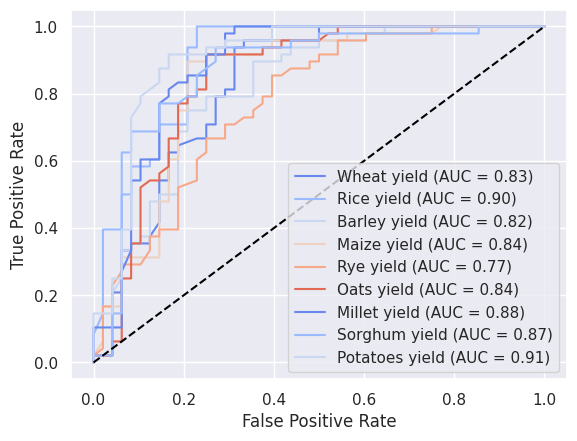

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_curve, auc
import matplotlib.pyplot as plt

# Crop yields to predict
crop_yields = ['Wheat yield', 'Rice yield', 'Barley yield', 'Maize yield', 'Rye yield', 'Oats yield', 'Millet yield', 'Sorghum yield', 'Potatoes yield']

# Features
X = new_data[['Year', 'fertilizer_quantity', 'Nitrogen', 'Potash', 'Phosphate', 'Pesticides']]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, new_data[crop_yields], test_size=0.2, random_state=42)

# KNN regression models
knn_models = {}
k = 5
for yield_column in crop_yields:
   knn_model = KNeighborsRegressor(n_neighbors=k)
   knn_model.fit(X_train, y_train[yield_column])
   knn_models[yield_column] = knn_model

# Binarize yields based on median
for yield_column in crop_yields:
   y_test[yield_column] = (y_test[yield_column] > y_test[yield_column].median()).astype(int)


# Make predictions
predictions = {}
for yield_column in crop_yields:
   y_pred = knn_models[yield_column].predict(X_test)
   predictions[yield_column] = y_pred


# Evaluate models
for yield_column in crop_yields:
   mse = mean_squared_error(y_test[yield_column], predictions[yield_column])
   print(f"MSE for {yield_column}: {mse}")

# Make predictions as usual


# ROC Curves
plt.figure()
for yield_column in crop_yields:
   fpr, tpr, _ = roc_curve(y_test[yield_column], predictions[yield_column])
   roc_auc = auc(fpr, tpr)
   plt.plot(fpr, tpr, label=f"{yield_column} (AUC = {roc_auc:0.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# WHEAT CROP PREDICTION ON 2020(next year) USING DIFFERENT MODELS.

## KMeans Clustering

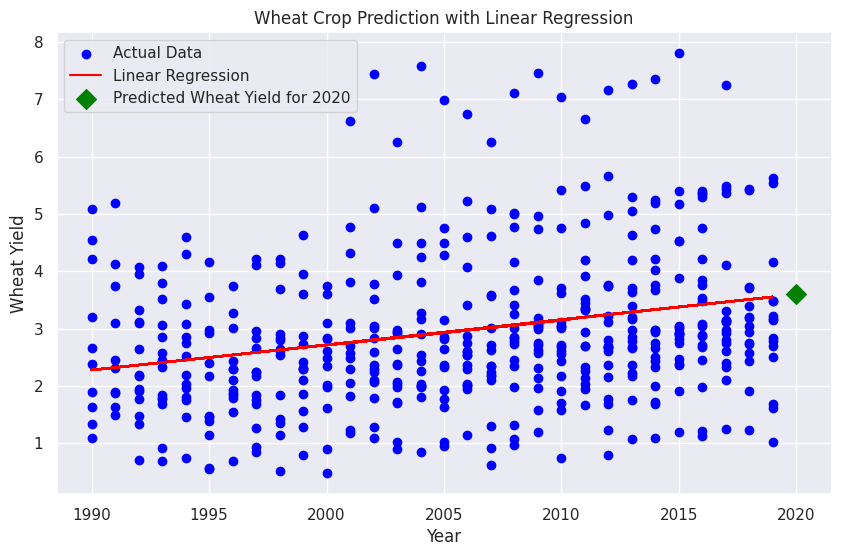

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select relevant columns
data = new_data[['Year', 'Wheat yield']]


# Perform clustering on the years
n_clusters = 3  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
data['Year Cluster'] = kmeans.fit_predict(data[['Year']].values)

# Split the data into training and testing sets
X = data[['Year Cluster', 'Year']]
y = data['Wheat yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the wheat yield for the next year
next_year = max(data['Year']) + 1
next_year_cluster = kmeans.predict(np.array([[next_year]]))
next_year_prediction = model.predict([[next_year_cluster[0], next_year]])

# Plot the linear graph
plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Wheat yield'], color='blue', label='Actual Data')
plt.plot(data['Year'], model.predict(X), color='red', label='Linear Regression')
plt.scatter(next_year, next_year_prediction, color='green', marker='D', s=100, label=f'Predicted Wheat Yield for {next_year}')
plt.xlabel('Year')
plt.ylabel('Wheat Yield')
plt.legend()
plt.title('Wheat Crop Prediction with Linear Regression')
plt.show()


## Prediction using LINEAR REGRESSION.

Predicted Wheat Yield for 2020: 3.64563601360085


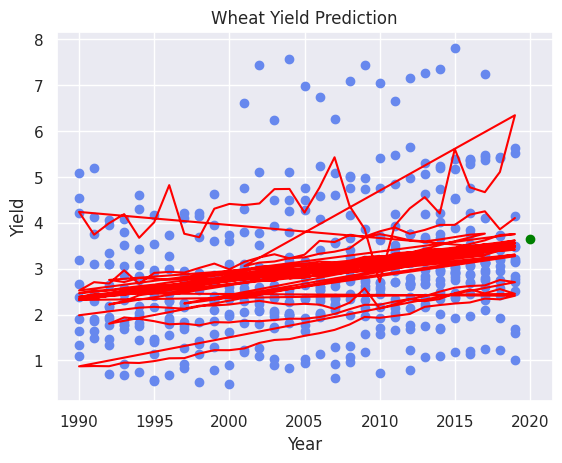

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Build training data
X_train = new_data[['Year', 'fertilizer_quantity', 'Nitrogen', 'Potash', 'Phosphate',
              'Pesticides', 'Water_resources']]
y_train = new_data['Wheat yield']

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on new data
X_new = [[2020, 180, 200, 150, 130, 170, 210]]
y_pred = model.predict(X_new)
print("Predicted Wheat Yield for 2020:", y_pred[0])

# Plot predictions
plt.scatter(X_train['Year'], y_train)
plt.plot(X_train['Year'], model.predict(X_train), color='red')
plt.scatter([2020], y_pred, color='green')
plt.title("Wheat Yield Prediction")
plt.xlabel("Year"); plt.ylabel("Yield")
plt.show()

## Prediction using DECISION TREE.

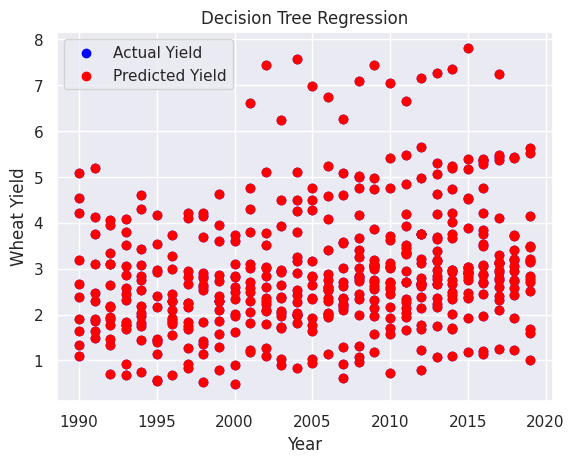

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


# Features and target
X = new_data[['Year', 'fertilizer_quantity', 'Nitrogen', 'Potash', 'Phosphate',
              'Pesticides', 'Water_resources']]
y = new_data['Wheat yield']

# Train model
model = DecisionTreeRegressor()
model.fit(X, y)

# Predict on historical data
y_pred = model.predict(X)

# Plot results
plt.scatter(X['Year'], y, color='blue', label='Actual Yield')
plt.scatter(X['Year'], y_pred, color='red', label='Predicted Yield')
plt.legend()
plt.xlabel('Year'); plt.ylabel('Wheat Yield')
plt.title('Decision Tree Regression')
plt.show()

Predicted Wheat Yield for 2020: 5.19


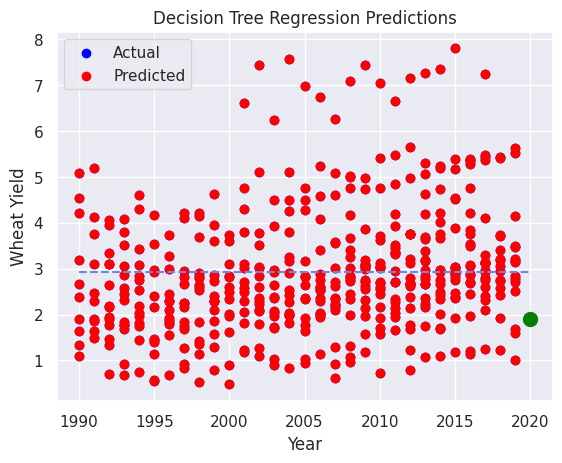

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Same features
X_train = new_data[['Year', 'fertilizer_quantity', 'Nitrogen', 'Potash', 'Phosphate',
              'Pesticides', 'Water_resources']]
y_train = new_data['Wheat yield']

# Train decision tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict on new data
X_new = [[2020, 180, 200, 150, 130, 170, 210]]
y_pred = model.predict(X_new)

print("Predicted Wheat Yield for 2020:", y_pred[0])
# Actual wheat yields
plt.scatter(X_train['Year'], y_train, color='blue')

# Predicted wheat yields
y_pred = model.predict(X_train)
plt.scatter(X_train['Year'], y_pred, color='red')

# Labels
plt.legend(['Actual','Predicted'])
plt.xlabel('Year'); plt.ylabel('Wheat Yield')

# 2020 prediction
plt.scatter([2020], y_pred[0], color='green', s=100)

# Plot line at mean
avg_yield = y_train.mean()
plt.hlines(avg_yield, xmin=X_train['Year'].min(), xmax=2020, linestyles='--')

plt.title('Decision Tree Regression Predictions')
plt.show()

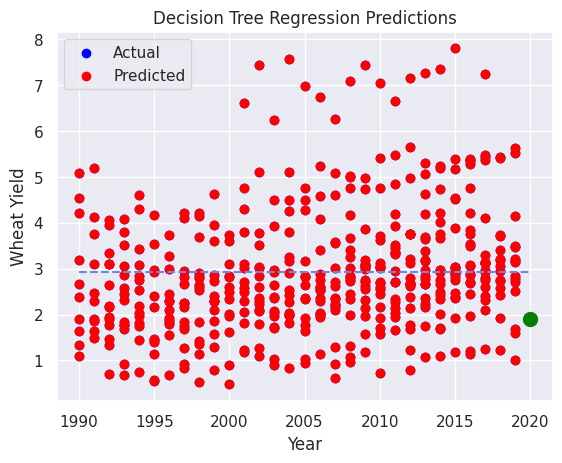

In [ ]:
import matplotlib.pyplot as plt

# Actual wheat yields
plt.scatter(X_train['Year'], y_train, color='blue')

# Predicted wheat yields
y_pred = model.predict(X_train)
plt.scatter(X_train['Year'], y_pred, color='red')

# Labels
plt.legend(['Actual','Predicted'])
plt.xlabel('Year'); plt.ylabel('Wheat Yield')

# 2020 prediction
plt.scatter([2020], y_pred[0], color='green', s=100)

# Plot line at mean
avg_yield = y_train.mean()
plt.hlines(avg_yield, xmin=X_train['Year'].min(), xmax=2020, linestyles='--')

plt.title('Decision Tree Regression Predictions')
plt.show()

## Prediction using RANDOM FOREST.

Predicted Wheat Yield for 2020: 3.927294906


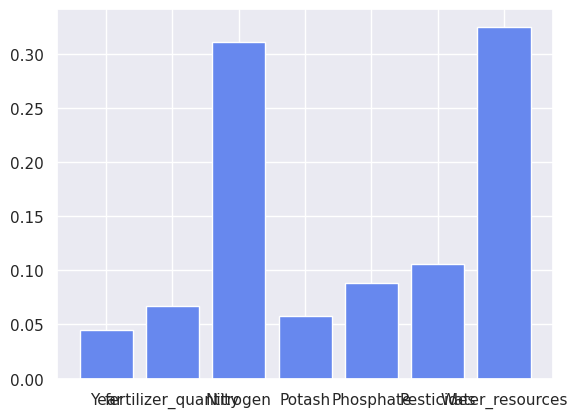

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Same feature columns
X_train = new_data[['Year', 'fertilizer_quantity', 'Nitrogen', 'Potash', 'Phosphate',
              'Pesticides', 'Water_resources']]
y_train = new_data['Wheat yield']

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict 2020 yield
X_new = [[2020, 180, 200, 150, 130, 170, 210]]
y_pred = rf_model.predict(X_new)

print("Predicted Wheat Yield for 2020:", y_pred[0])

# Plot feature importances
importances = rf_model.feature_importances_
plt.bar(X_train.columns, importances)
plt.show()

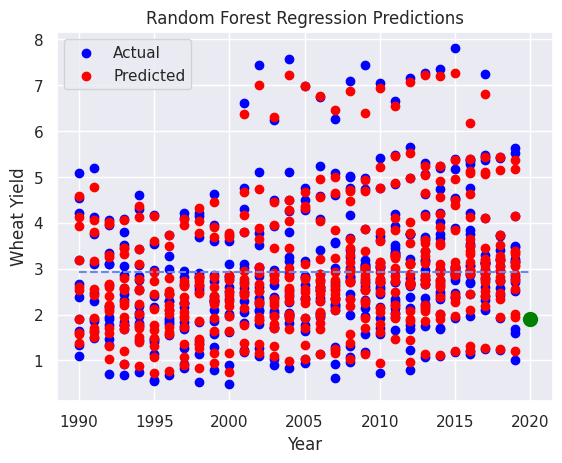

In [ ]:
import matplotlib.pyplot as plt

# Actual wheat yields
plt.scatter(X_train['Year'], y_train, color='blue')

# Predicted wheat yields
y_pred = rf_model.predict(X_train)
plt.scatter(X_train['Year'], y_pred, color='red')

# Labels
plt.legend(['Actual','Predicted'])
plt.xlabel('Year'); plt.ylabel('Wheat Yield')

# 2020 Prediction
plt.scatter([2020], y_pred[0], color='green', s=100)

# Average line
avg_yield = y_train.mean()
plt.hlines(avg_yield, xmin=X_train['Year'].min(), xmax=2020, linestyles='--')

plt.title('Random Forest Regression Predictions')
plt.show()

# Prediction using LSTM(Long Short Term Memory)

15/15 [==============================] - 0s 2ms/step


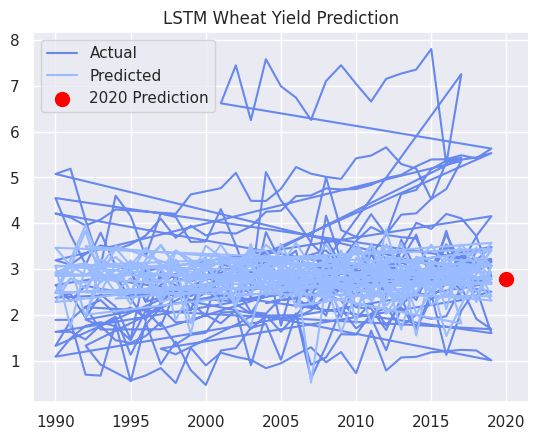

Predicted wheat yield for 2020: 2.7868977


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Reshape features for time series
X = new_data[['Year', 'fertilizer_quantity', 'Nitrogen', 'Potash', 'Phosphate',
              'Pesticides', 'Water_resources']].values.reshape(-1,1,4)
y = new_data['Wheat yield'].values

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, 4)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Fix by taking first 480 samples
X = X[:480]
y = y[:480]

# Train model
model.fit(X, y, epochs=100, verbose=0)

# Make prediction
x_input = np.array([[2020,170,200,24]])
x_input = x_input.reshape((1,1,4))
y_pred = model.predict(x_input)[0][0]


# Visualize results
plt.plot(new_data['Year'], new_data['Wheat yield'], label='Actual')
plt.plot(new_data['Year'], model.predict(X), label='Predicted')
plt.scatter([2020], [y_pred], s=100, color='red', label='2020 Prediction')
plt.title('LSTM Wheat Yield Prediction')
plt.legend()
plt.show()

print('Predicted wheat yield for 2020:', y_pred)

# CROP RECOMMENDATION SYSTEM BASED ON FEATURE SET.

## Recommendation system for all the crops except potato as it has high range in yeild for almost all the countries.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
crop_yields = new_data[[
   'Wheat yield',
   'Rice yield',
   'Barley yield',
   'Maize yield',
   'Rye yield',
   'Oats yield',
   'Millet yield',
   'Sorghum yield']]

In [ ]:
new_data['crop_type'] = crop_yields.idxmax(axis=1)

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(new_data['crop_type'])

In [ ]:
X = new_data[['fertilizer_quantity', 'Nitrogen', 'Potash', 'Phosphate', 'Pesticides', 'Water_resources']]

## Using random forest classifier for the recommendation system.

In [ ]:
# Train model
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [ ]:
# Input features

fertilizer_qty = float(input("Enter fertilizer quantity: "))
Nitrogen = float(input("Enter Nitrogen quantity: "))
Potash = float(input("Enter Potash quantity: "))
Phosphate = float(input("Enter Phosphate quantity: "))
Pesticides = float(input("Enter Pesticides quantity: "))
Water_resources = float(input("Enter Water resource quantity: "))

# Put in dataframe
user_input = pd.DataFrame({
    'fertilizer_quantity': [fertilizer_qty],
    'Nitrogen': [Nitrogen],
    'Potash': [Potash],
    'Phosphate': [Phosphate],
    'Pesticides': [Pesticides],
    'Water_resources': [Water_resources] })



# Make predictions
predictions = model.predict(user_input)

# Get crop name
crops = label_encoder.inverse_transform(predictions)
print("Highest yielding crop:", crops[0])

Enter fertilizer quantity: 322884
Enter Nitrogen quantity: 95700
Enter Potash quantity: 17100
Enter Phosphate quantity: 54500
Enter Pesticides quantity: 26156
Enter Water resource quantity: 8820.087
Highest yielding crop: Maize yield
